### Preparation of data for modelling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [20]:
student1=pd.read_csv('student-mat.csv',sep=';',header=0)
student2=pd.read_csv('student-por.csv',sep=';',header=0)

In [22]:
student1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [23]:
student2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [25]:
students=pd.concat([student1,student2])

In [26]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [28]:
print(students.shape)

(1044, 33)


In [30]:
total=students.isnull().sum().sort_values(ascending=False)
print(total)

school        0
paid          0
G2            0
G1            0
absences      0
health        0
Walc          0
Dalc          0
goout         0
freetime      0
famrel        0
romantic      0
internet      0
higher        0
nursery       0
activities    0
famsup        0
sex           0
schoolsup     0
failures      0
studytime     0
traveltime    0
guardian      0
reason        0
Fjob          0
Mjob          0
Fedu          0
Medu          0
Pstatus       0
famsize       0
address       0
age           0
G3            0
dtype: int64


In [31]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


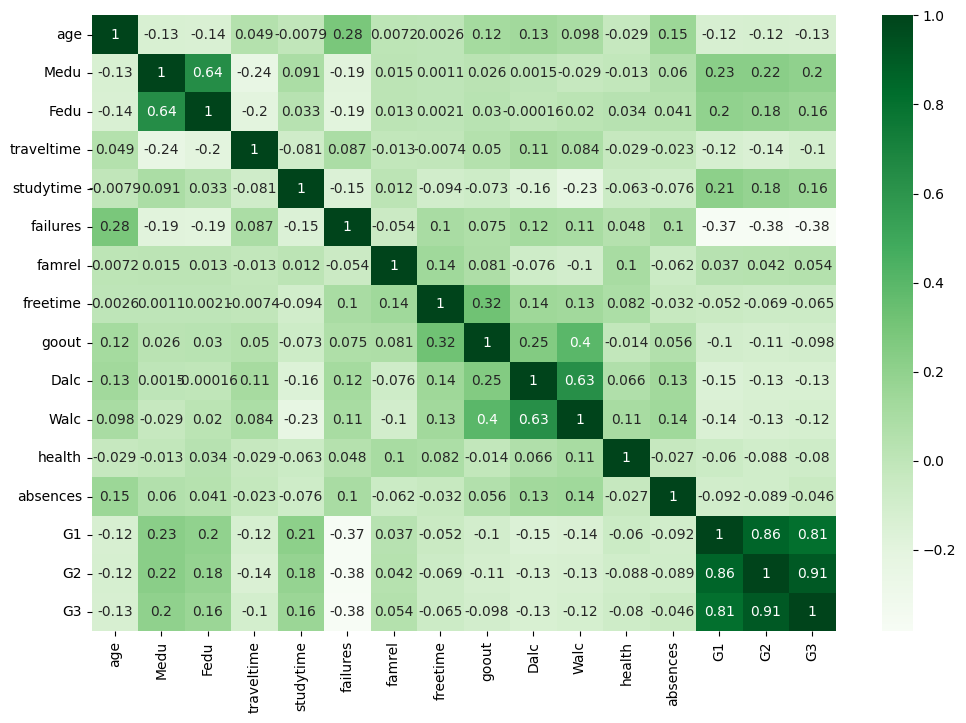

In [39]:
# Inspect feature correlations
numericValues=students.select_dtypes(include=[int,float])
plt.figure(figsize=(12,8))
ax = sns.heatmap(numericValues.corr(),cmap='Greens', annot=True)
plt.show()

In [40]:
numericValues.corr()[['G3']].sort_values(by='G3', ascending=False)

,G3
G3,1.000000
G2,0.910743
G1,0.809142
Medu,0.201472
studytime,0.161629
Fedu,0.159796
famrel,0.054461
absences,-0.045671
freetime,-0.064890
health,-0.080079


In [41]:
from sklearn.preprocessing import OneHotEncoder

encoded_students = OneHotEncoder().fit_transform(students).toarray()
print(encoded_students)

[[1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [42]:
encoded_students.shape

(1044, 192)

In [44]:
student_df=pd.DataFrame(encoded_students)

c:\Users\Rabin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  func(x=x, y=y, **kwargs)
c:\Users\Rabin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
c:\Users\Rabin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  func(x=x, y=y, **kwargs)
c:\Users\Rabin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `f

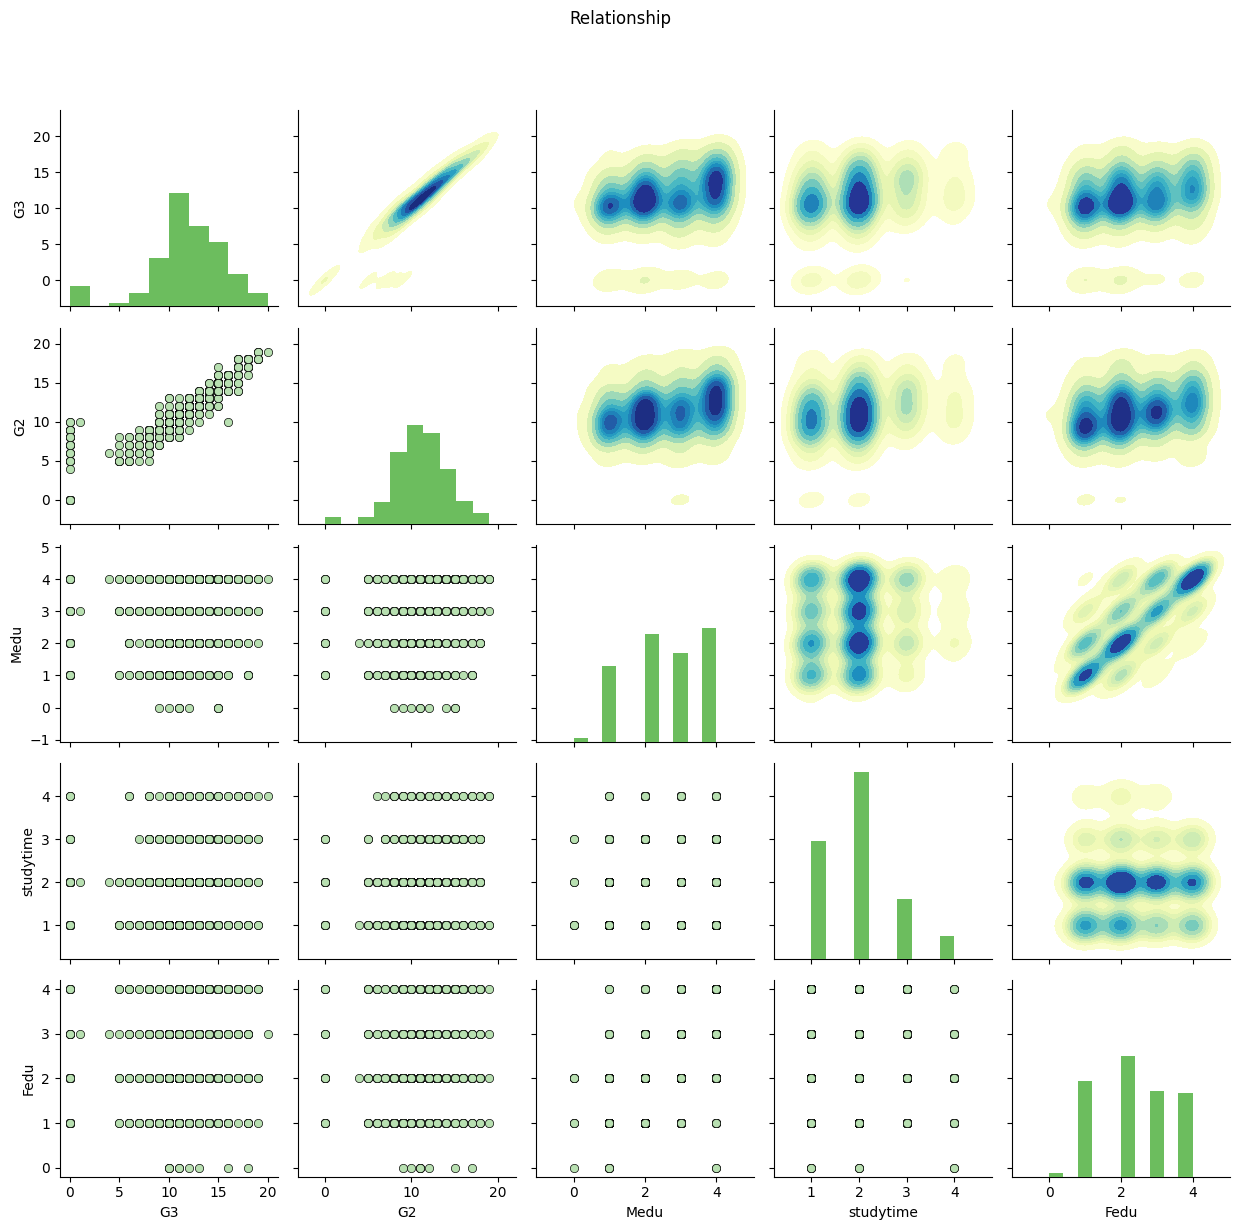

In [48]:
g = sns.PairGrid(numericValues[['G3', 'G2', 'Medu','studytime','Fedu']])
g=g.map_upper(sns.kdeplot, cmap="YlGnBu", shade=True, shade_lowest=False)
g=g.map_diag(plt.hist, color="#6cbd5e")
g=g.map_lower(sns.scatterplot,color="#b8e0b1",edgecolor='k')

g.fig.tight_layout()
g.fig.suptitle('Relationship')
plt.subplots_adjust(top=0.9)